### Libraries import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import circlify

### Style

In [3]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [4]:
dataset = pd.read_csv('./../data/fuoriuscita/vittime_1522/Vittime - sesso, tipo violenza, stato d’animo della vittima (2013-2022).csv')

dataset

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,SEXISTAT1,Sesso,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2013,2013,434,NaN,NaN
1,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2014,2014,110,NaN,NaN
2,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2015,2015,67,NaN,NaN
3,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2016,2016,80,NaN,NaN
4,IT,Italia,VICTIMS,vittime di violenza,M,maschi,PHY,violenza fisica,ALL,tutte le voci,2017,2017,66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2015,2015,1,NaN,NaN
2289,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2019,2019,2,NaN,NaN
2290,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2020,2020,9,NaN,NaN
2291,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2021,2021,12,NaN,NaN


Ottenimento dati nazionali ed eliminazione di dati inutili e/o ridondanti:

In [5]:
country_data = dataset[dataset['ITTER107'] == 'IT'] # ottiene solo dati nazionali

# rimozione di:
# - "Seleziona periodo" e "Sesso" che contengono dati ridondanti rispettivamente di "TIME" e "SEXISTAT1"
# - "ITTER107" e "Territorio" in quanto non vi è più alcuna distinzione, i dati mantenuti sono tutti nazionali
# - "Flag Codes" e "Flags" in quanto inutili
# - "TIPO_DATO_1522" e "Tipo dato" in quanto non utilizzati e ridondanti
# - "SEXISTAT1" in quanto i dati non presentano dist
country_data = country_data.drop(columns=['Seleziona periodo', 'Sesso', 'Flag Codes', 'Flags', 'Territorio', 'ITTER107', 'TIPO_DATO_1522', 'Tipo dato'])

country_data

,SEXISTAT1,TIPOVIOLENZA,Tipo di violenza,STATI_MORBOSI,Stato d'animo,TIME,Value
0,M,PHY,violenza fisica,ALL,tutte le voci,2013,434
1,M,PHY,violenza fisica,ALL,tutte le voci,2014,110
2,M,PHY,violenza fisica,ALL,tutte le voci,2015,67
3,M,PHY,violenza fisica,ALL,tutte le voci,2016,80
4,M,PHY,violenza fisica,ALL,tutte le voci,2017,66
...,...,...,...,...,...,...,...
2288,NRP,UNAV,non disponibile,UNAV,non disponibile,2015,1
2289,NRP,UNAV,non disponibile,UNAV,non disponibile,2019,2
2290,NRP,UNAV,non disponibile,UNAV,non disponibile,2020,9
2291,NRP,UNAV,non disponibile,UNAV,non disponibile,2021,12


Rimozione dei dati totali (aggregati) o non definiti per la tipologia della violenza, ritenzione solo dei più recenti (2022) e di quelli con aggregazione di tutti gli stati d'animo:

In [6]:
country_data = country_data[(country_data["TIPOVIOLENZA"] != 'UNAV') &
                            (country_data["TIME"] == 2022) & 
                            (country_data["TIPOVIOLENZA"] != 'ALL') & 
                            (country_data["STATI_MORBOSI"] == 'ALL')]

country_data = country_data.drop(columns=['STATI_MORBOSI', 'Stato d\'animo'])

country_data

,SEXISTAT1,TIPOVIOLENZA,Tipo di violenza,TIME,Value
9,M,PHY,violenza fisica,2022,80
19,M,SEXVIOL,violenza sessuale,2022,42
29,M,PHYVIOL,violenza psicologica,2022,74
39,M,ECON_VIOL,violenza economica,2022,2
59,M,THREATS,minacce,2022,21
69,M,HARASS_WORK,mobbing,2022,1
79,M,NRP,non risponde,2022,14
89,F,PHY,violenza fisica,2022,5024
99,F,SEXVIOL,violenza sessuale,2022,857
109,F,PHYVIOL,violenza psicologica,2022,3818


Creazione dataset maschile e femminile:

In [7]:
males = country_data[country_data['SEXISTAT1'] == 'M']
females = country_data[country_data['SEXISTAT1'] == 'F']

males, females

(   SEXISTAT1 TIPOVIOLENZA      Tipo di violenza  TIME  Value
 9          M          PHY      violenza fisica   2022     80
 19         M      SEXVIOL     violenza sessuale  2022     42
 29         M      PHYVIOL  violenza psicologica  2022     74
 39         M    ECON_VIOL    violenza economica  2022      2
 59         M      THREATS               minacce  2022     21
 69         M  HARASS_WORK               mobbing  2022      1
 79         M          NRP          non risponde  2022     14,
      SEXISTAT1 TIPOVIOLENZA      Tipo di violenza  TIME  Value
 89           F          PHY      violenza fisica   2022   5024
 99           F      SEXVIOL     violenza sessuale  2022    857
 109          F      PHYVIOL  violenza psicologica  2022   3818
 119          F    ECON_VIOL    violenza economica  2022    125
 139          F      THREATS               minacce  2022    610
 149          F  HARASS_WORK               mobbing  2022     40
 159          F          NRP          non risponde  202

### Plot

Sorting dei dati e predisposizione posizioni nel plot:

In [8]:
# crea nuovi dataframe per evitare i warning relativi al fatto che si modifica una 
# porzione di un dataframe più grosso
males = males.copy()
females = females.copy()

# sorta i record del dataframe in base al valore in maniera decrescente
females.sort_values(by=['Value'], inplace=True, ascending=False)
males.sort_values(by=['Value'], inplace=True, ascending=False)

Definizione della palette colori:

In [9]:
females_palette = ["#F7DEE5", "#EEC1D2", "#D791B5", "#C4679B", "#AC4187", "#7D275C", "#481437"]
males_palette = ["#CADBE2", "#9CBCCE", "#6694AB", "#357091", "#1E587F", "#193F57", "#0B1D27"]

# a seconda se si vuole il più grande più scuro o viceversa
# females_palette.reverse() 
# males_palette.reverse()

Plot sulle vittime donne:

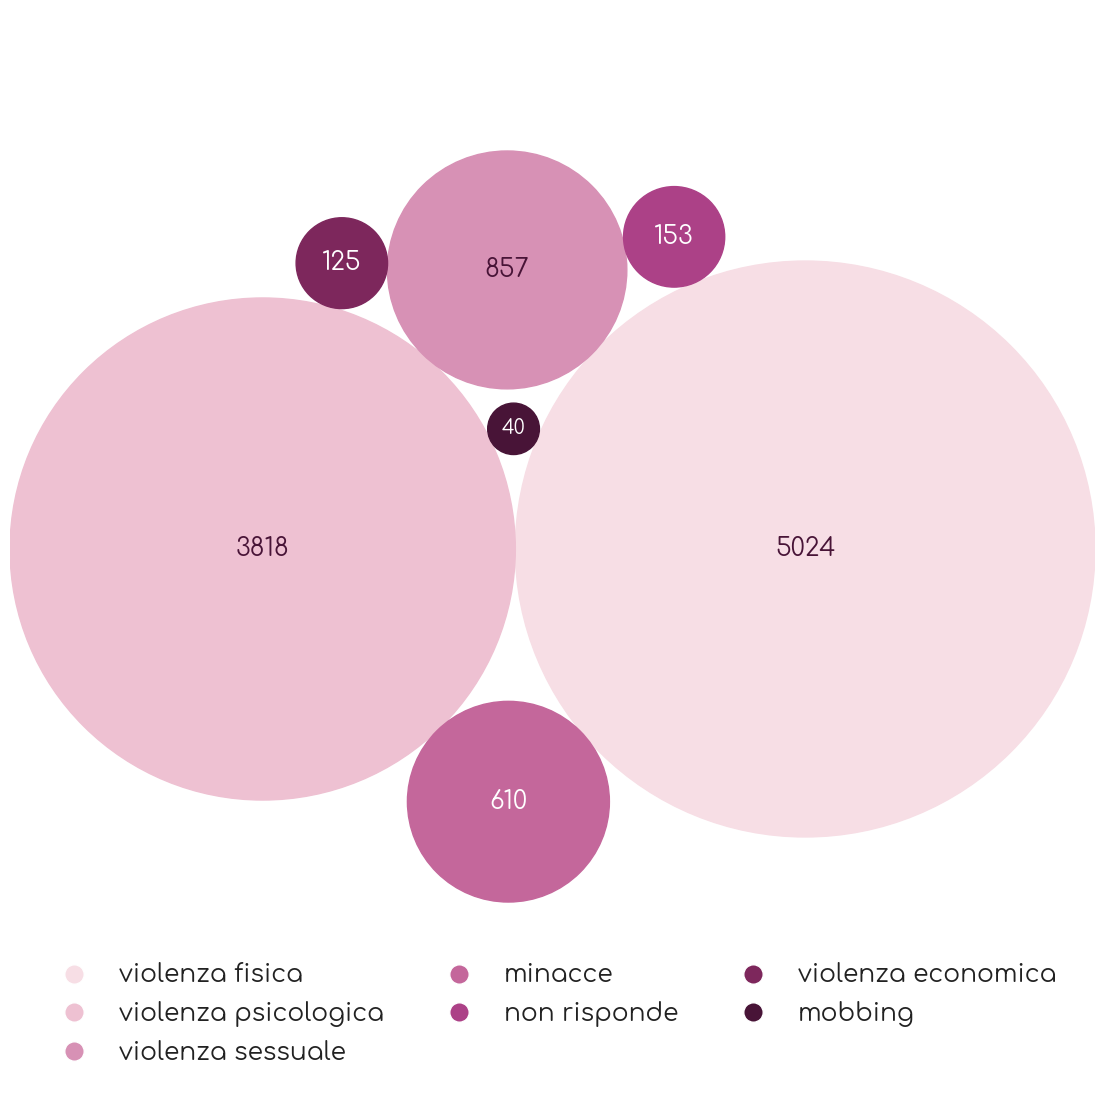

In [10]:
# label del grafico, contengono solo il numero di persone,la relativa categoria sarà nella label
labels = [str(percentage) for percentage in females['Value']]

# calcolo posizioni dei cerchi
circles = circlify.circlify(females['Value'].tolist(), show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0))
circles.reverse()

# plot
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')

ax.axis('off') # rimozione assi

flim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-flim, flim)
plt.ylim(-flim, flim)

# idx -> indice del cerchio corrente
# circle -> cerchio corrente
# percentage -> stringa che contiene il numero di persone corrispondente al cerchio
# color -> colore corrente (da usare per il cerchio) preso dalla palette
for idx, circle, percentage, color in zip(range(0, len(labels)), circles, labels, females_palette):
    x, y, r = circle # informazioni cerchio
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color=color)) # colorazione cerchio

    # selezione del colore del font in modo che sia a contrasto col colore del cerchio
    font_color = 'white' if idx > 2 else females_palette[-1]
    # selezione della dimensione della label in base alla dimensione del cerchio
    font_size = 18 if r > 0.06 else 14

    # impostazione della label
    plt.annotate(percentage, (x,y), size=font_size, color=font_color, va='center', ha='center')

# legenda custom
legend_circles = [Line2D([], [], color='white', marker='o', markersize=14, markerfacecolor=x) for x in females_palette]
legend_labels = [x for x in females['Tipo di violenza'].values]
plt.legend(legend_circles, legend_labels, loc=8, ncol=3, frameon=False, prop={'size': 18})

plt.xticks([])
plt.yticks([])

plt.show()

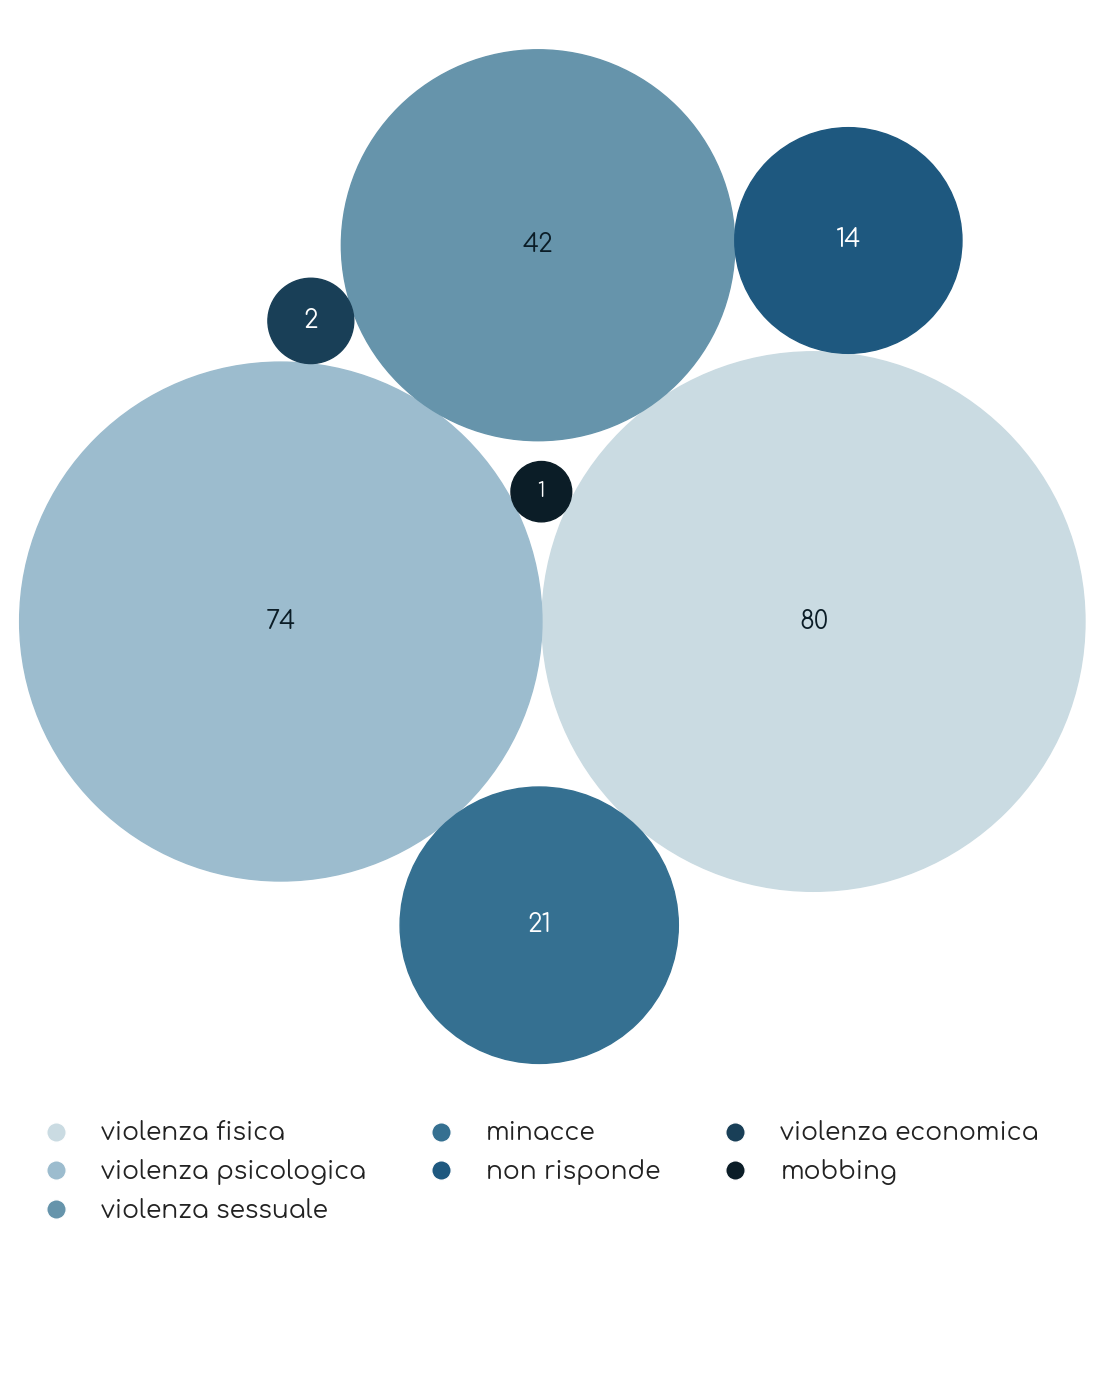

In [12]:
# label del grafico, contengono solo il numero di persone,la relativa categoria sarà nella label
labels = [str(percentage) for percentage in males['Value']]

# calcolo posizioni dei cerchi
circles = circlify.circlify(males['Value'].tolist(), show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0))
circles.reverse()

# plot
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')

ax.axis('off') # rimozione assi

lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-flim, flim)
plt.ylim(-flim, flim)

# idx -> indice del cerchio corrente
# circle -> cerchio corrente
# percentage -> stringa che contiene il numero di persone corrispondente al cerchio
# color -> colore corrente (da usare per il cerchio) preso dalla palette
for idx, circle, percentage, color in zip(range(0, len(labels)), circles, labels, males_palette):
    x, y, r = circle # informazioni cerchio
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color=color)) # colorazione cerchio

    # selezione del colore del font in modo che sia a contrasto col colore del cerchio
    font_color = 'white' if idx > 2 else males_palette[-1]
    # selezione della dimensione della label in base alla dimensione del cerchio
    font_size = 18 if r > 0.06 else 14

    # impostazione della label
    plt.annotate(percentage, (x,y), size=font_size, color=font_color, va='center', ha='center')

# legenda custom
legend_circles = [Line2D([], [], color='white', marker='o', markersize=14, markerfacecolor=x) for x in males_palette]
legend_labels = [x for x in males['Tipo di violenza'].values]
# previene l'overlap della legenda con il grafico
legend_ax = fig.add_axes([0.2, -0.1, 0.6, 0.3])  
legend_ax.axis('off')  
legend_ax.legend(legend_circles, legend_labels, loc='center', ncol=3, frameon=False, prop={'size': 18})
legend_ax.set_xlim(0, 1)
legend_ax.set_ylim(0, 1)

plt.xticks([])
plt.yticks([])

plt.show()